To avoid importing libraries in each code, we import them here once and use them in all of our codes.

In [39]:
import numpy as np
import scipy.integrate as integ
import matplotlib.pyplot as plt

Question 1:

Write a python function that takes 4 arguments a, b, N and fn where
a and b determine an interval in <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow data-mjx-texclass="ORD">
    <mi mathvariant="double-struck">R</mi>
  </mrow>
</math>,
N is a positive integer and
fn is a real valued function.
The function you write should calculate the Riemann sum of the function fn over the interval [a,b] with N equal subintervals.

Solution:

Riemann Sum of a function will estimate the area between the function and the x-axis, that is, the integral of the function, in an interval (a, b). This is done by forming a number of rectangles with equal width and calculating and summing the area of these rectangles which is in fact an indicator of the area under the function. In this program, we will use the middle point of the width of each rectangle to calculate its height (f(x)), and then by multiplication of the width and height, we will obtain the area.

In [40]:
def Riemann_sum(a,b,N,fn):
    delta_x = (b-a)/N           #calculates the width of each rectangele
    result = 0
    middle_point = a - (delta_x/2)  #sets the start position so that by adding delta_x each time, the middle point of the width of rectangle is obtained
    for i in range(N):
        middle_point += delta_x    #calculates the middle point of rectangle for each step
        height = fn(middle_point)
        result += (height * delta_x)
    return result

To evaluate the performance of our code, we compare its result on an example with a result that we have obtained from scipy on the same example, as follows:

In [41]:
fn = lambda k: k**3-1
a = -2
b = 3
N = 1500

Riemann_sum_result = Riemann_sum(a,b,N,fn)
scipy_result = integ.quad(fn, a, b)
print(f"Riemann sum result is: {Riemann_sum_result}")
print(f"scipy result is: {scipy_result[0]}")

Riemann sum result is: 11.24999305555685
scipy result is: 11.250000000000002


Question 2:

We want to sample random points from the unit circle <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msup>
    <mi>x</mi>
    <mn>2</mn>
  </msup>
  <mo>+</mo>
  <msup>
    <mi>y</mi>
    <mn>2</mn>
  </msup>
  <mo>=</mo>
  <mn>1</mn>
</math>
. Write a python function which takes one parameter <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>N</mi>
</math> the number of sample points and returns a sample  points on the unit circle as a <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>N</mi>
  <mo>&#xD7;</mo>
  <mn>2</mn>
</math> numpy matrix. Calculate some examples, and visualize them.

Solution:

Since the unit circle is centered on the origin of the coordinate plane, every point on it can be shown by an angle (theta). Therefore, all we do is to find a random theta between 0 and 2pi and then calculate the corresponding coordinates (x, y).

In [42]:
def random_point_on_circle(N):
    random_points_array = np.zeros((N,2))
    for i in range(N):
        theta = np.random.uniform(0, 2*np.pi)
        y = np.sin(theta)
        x = np.cos(theta)
        random_points_array[i] = [x,y]
    plt.scatter(random_points_array[:,0], random_points_array[:,1])
    plt.show()

We visualize this for 100 points on unit circle:

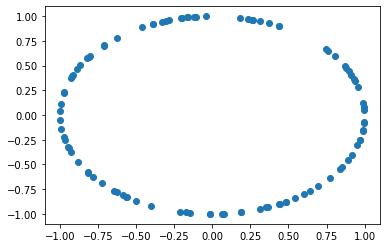

In [43]:
random_point_on_circle(100)

Question 3:

Generalize the function above to sampling over the unit sphere <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msup>
    <mi>x</mi>
    <mn>2</mn>
  </msup>
  <mo>+</mo>
  <msup>
    <mi>y</mi>
    <mn>2</mn>
  </msup>
  <mo>+</mo>
  <msup>
    <mi>z</mi>
    <mn>2</mn>
  </msup>
  <mo>=</mo>
  <mn>1</mn>
</math>
. The function should return a <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>N</mi>
  <mo>&#xD7;</mo>
  <mn>3</mn>
</math> numpy array. Calculate some examples, and visualize them. [Hint: Use spherical coordinates.]

solution:
    
In this question, we use somewhat the same procedure that we used for question 2. Every point on the unit sphere can be shown with two angles, theta and phi. The difference is that in this case, there is an extra dimension z which brings along another angle, phi. So we can find two random angles and obtain the corresponding x, y and z, although the calculations are more complicated in this case.

In [44]:
def rand_points_on_unit_sphere(N):
    rand_points_array = np.zeros((N,3)) 
    for j in range(N):
        theta = np.random.uniform(0,np.pi*2)
        g = np.random.uniform(0,1)
        phi =np.arccos((2*g)-1)
        x= np.sin(phi) * np.cos(theta);
        y= np.sin(phi) * np.sin(theta);
        z= np.cos(phi)
        rand_points_array[j] = [x, y, z]
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.scatter(rand_points_array[:,0],rand_points_array[:,1],rand_points_array[:,2])
    plt.show()

We visualize it for 200 points on the unit circle:

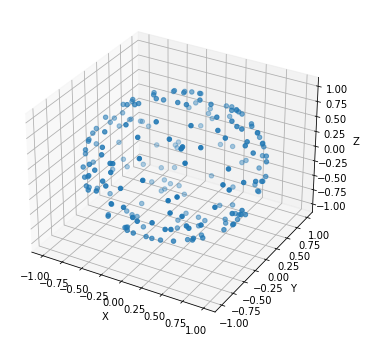

In [45]:
rand_points_on_unit_sphere(200)